In [35]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [5]:
df = pd.read_csv("iris.csv")

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
df["species"].unique()  

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
df["species"] = df.species.map({"setosa":0,"versicolor":1,"virginica":2})

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df.shape

(150, 5)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(df[["sepal_length","sepal_width","petal_length","petal_width"]],df["species"],test_size = 0.2,random_state=33)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [22]:
nb = GaussianNB()

In [23]:
nb.fit(X_train_std,Y_train)

GaussianNB()

In [26]:
print(f"Accuracy:{accuracy_score(Y_test, nb.predict(X_test_std))}")

Accuracy:0.9333333333333333


In [28]:
print(f"Confusion matrix: \n{confusion_matrix(Y_test, nb.predict(X_test_std))}")

Confusion matrix: 
[[ 8  0  0]
 [ 0  8  0]
 [ 0  2 12]]


In [29]:
print(f"Classification report:\n{classification_report(Y_test, nb.predict(X_test_std))}")

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      1.00      0.89         8
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



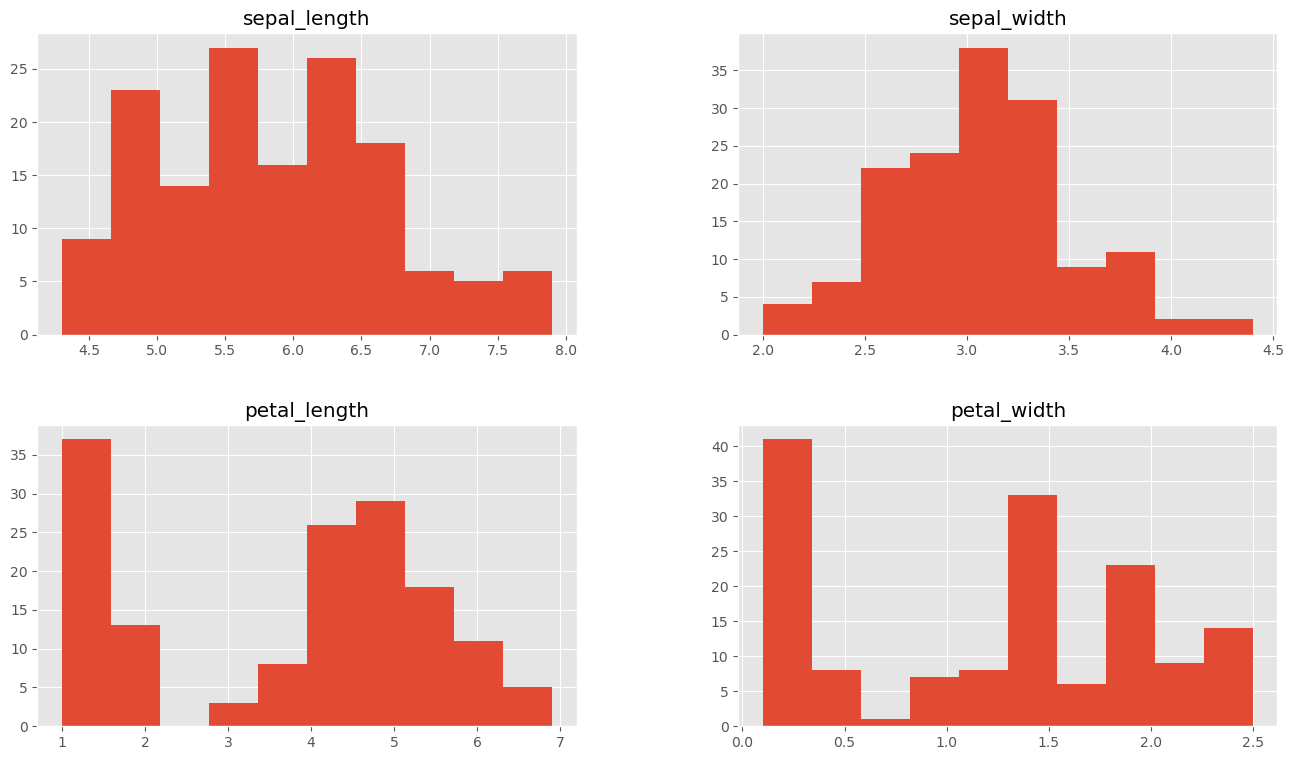

In [33]:
df.drop(['species'], axis=1).hist()
plt.show()

<Axes: >

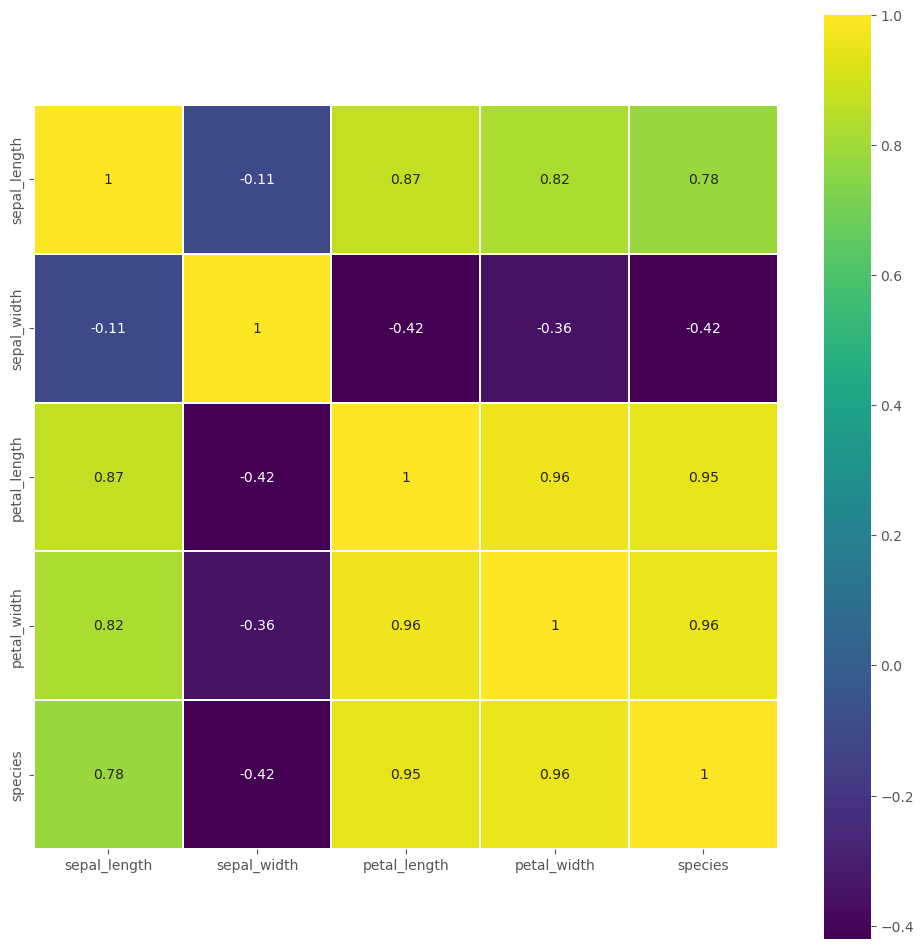

In [38]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
sb.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)